# web scrapping & data Wrangling with python

In [123]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table', {'class': 'wikitable'})


for i, table in enumerate(tables):
  
    headers = [header.text.strip() for header in table.find_all('th')]
    
    
    data = []
    for row in table.find_all('tr')[1:]: 
        cols = row.find_all('td')
        if cols:
            data.append([col.text.strip() for col in cols])
    
   
    df = pd.DataFrame(data, columns=headers)
    
    
    
    
    df.to_csv(f'largest_companies_us_table_{i+1}.csv', index=False)

In [124]:
df=pd.read_csv(r'largest_companies_us_table_1.csv') #2024
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [125]:
df['Revenue (USD millions)']=df['Revenue (USD millions)'].str.replace(',','')

In [126]:
df['Revenue growth']=df['Revenue growth'].str.replace('%','')

In [127]:
df['Employees']=df['Employees'].str.replace(',','')

In [128]:
df['Employees']=df['Employees'].astype(int)

In [129]:
df['Revenue (USD millions)']=df['Revenue (USD millions)'].astype(int)

In [130]:
df['Revenue growth']=df['Revenue growth'].astype(float)

In [131]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,648125,6.0,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington"
2,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California"
3,4,UnitedHealth Group,Healthcare,371622,14.6,440000,"Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,45735,11.8,16023,"New York City, New York"
96,97,CHS,Agriculture cooperative,45590,-4.6,10609,"Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,45006,-2.5,34100,"New York City, New York"
98,99,Dow Chemical Company,Chemical industry,44622,-21.6,35900,"Midland, Michigan"


In [132]:
top_5=df.groupby('Industry')['Revenue growth'].sum().nlargest(5)
top_5

Industry
Financials            323.4
Technology            117.2
Healthcare             62.3
Financial services     54.7
Airline                42.1
Name: Revenue growth, dtype: float64

In [133]:
industry_employees=df.groupby('Industry')['Employees'].sum().sort_values(ascending=False)
industry_employees.head()

Industry
Retail                        4799750
Retail and cloud computing    1525000
Healthcare                    1184620
Financials                    1040903
Transportation                 828950
Name: Employees, dtype: int32

In [134]:
correlation=df[['Revenue (USD millions)','Revenue growth']].corr()
correlation

,Revenue (USD millions),Revenue growth
Revenue (USD millions),1.000000,0.092598
Revenue growth,0.092598,1.000000


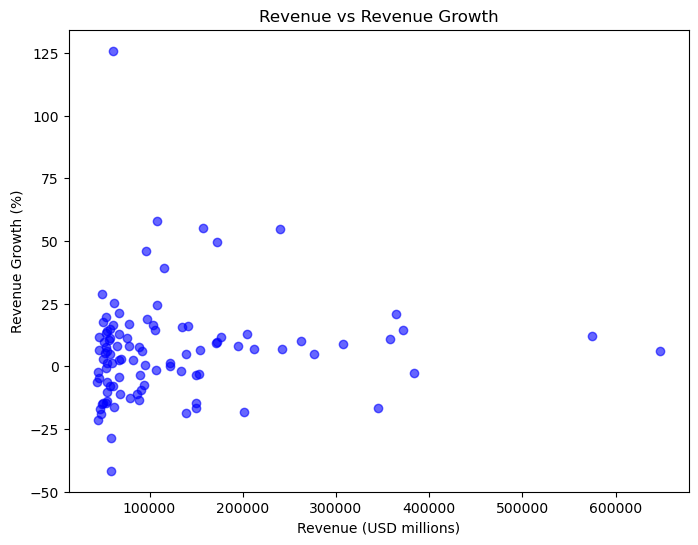

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['Revenue (USD millions)'], df['Revenue growth'], alpha=0.6, color='blue')
plt.title('Revenue vs Revenue Growth')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Revenue Growth (%)')
plt.show()

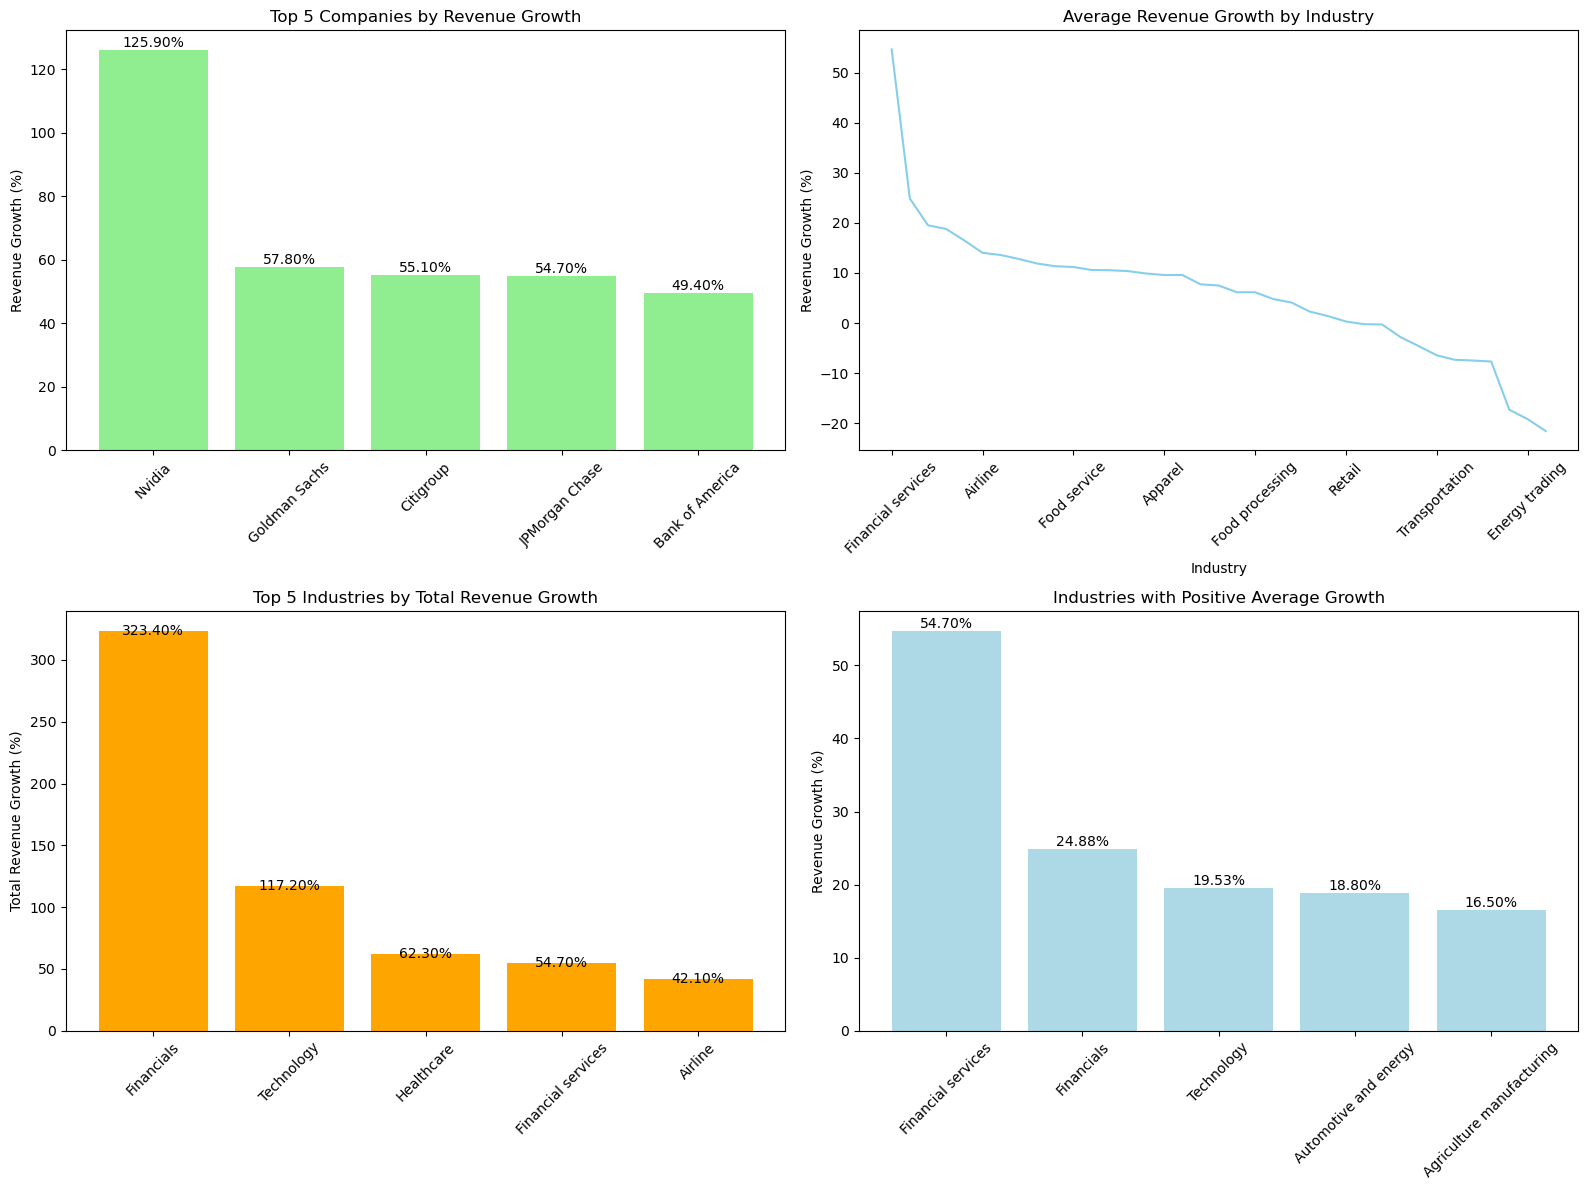

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns


top_growth = df.nlargest(5, "Revenue growth")


avg_growth_by_industry = df.groupby("Industry")["Revenue growth"].mean().sort_values(ascending=False)

top_5 = df.groupby('Industry')["Revenue growth"].sum().nlargest(5)


positive_industries = avg_growth_by_industry[avg_growth_by_industry > 0].head()


fig, axs = plt.subplots(2, 2, figsize=(16, 12))

bars = axs[0, 0].bar(top_growth["Name"], top_growth["Revenue growth"], color='lightgreen')
axs[0, 0].set_title("Top 5 Companies by Revenue Growth")
axs[0, 0].set_ylabel("Revenue Growth (%)")
axs[0, 0].tick_params(axis='x', rotation=45)
for bar in bars:
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', 
                   ha='center', va='bottom', fontsize=10)


avg_growth_by_industry.plot(kind='line', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title("Average Revenue Growth by Industry")
axs[0, 1].set_ylabel("Revenue Growth (%)")
axs[0, 1].tick_params(axis='x', rotation=45)


bars = axs[1, 0].bar(top_5.index, top_5.values, color='orange')
axs[1, 0].set_title("Top 5 Industries by Total Revenue Growth")
axs[1, 0].set_ylabel("Total Revenue Growth (%)")
axs[1, 0].tick_params(axis='x', rotation=45)
for bar in bars:
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', 
                   ha='center', va='center', fontsize=10)


bars = axs[1, 1].bar(positive_industries.index, positive_industries.values, color='lightblue')
axs[1, 1].set_title("Industries with Positive Average Growth")
axs[1, 1].set_ylabel("Revenue Growth (%)")
axs[1, 1].tick_params(axis='x', rotation=45)
for bar in bars:
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}%', 
                   ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.savefig('growth.png')


In [137]:
df2=pd.read_csv(r'largest_companies_us_table_2.csv') #2023
df2

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters
0,1,Cargill,Food industry,177.0,"160,000","Minnetonka, Minnesota"
1,2,Koch Industries,Conglomerate,125.0,"120,000","Wichita, Kansas"
2,3,Publix Super Markets,Retail,54.5,"250,000","Lakeland, Florida"
3,4,"Mars, Incorporated",Food industry,47.0,"140,000","McLean, Virginia"
4,5,H-E-B,Retail,43.6,"145,000","San Antonio, Texas"
5,6,Reyes Holdings,Wholesaling,40.0,"36,000","Rosemont, Illinois"
6,7,Enterprise Holdings,Car rental,35.0,"90,000","Clayton, Missouri"
7,8,C&S Wholesale Grocers,Wholesaling,34.7,"15,000","Keene, New Hampshire"
8,9,Love's,Petroleum industry and Retail,26.5,"40,000","Oklahoma City, Oklahoma"
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,"24,000","Miramar, Florida"


In [138]:
df2['Revenue (USD billions)']=df2['Revenue (USD billions)'].astype(float)

In [139]:
df2['Employees']=df2['Employees'].str.replace(',','')

In [140]:
df2['Employees']=df2['Employees'].astype(int)

In [141]:
df2['Revenue (USD millions)']=df2['Revenue (USD billions)']*1000

In [142]:
df2['Revenue (USD millions)']=df2['Revenue (USD millions)'].astype(int)

In [143]:
df2

,Rank,Name,Industry,Revenue (USD billions),Employees,Headquarters,Revenue (USD millions)
0,1,Cargill,Food industry,177.0,160000,"Minnetonka, Minnesota",177000
1,2,Koch Industries,Conglomerate,125.0,120000,"Wichita, Kansas",125000
2,3,Publix Super Markets,Retail,54.5,250000,"Lakeland, Florida",54500
3,4,"Mars, Incorporated",Food industry,47.0,140000,"McLean, Virginia",47000
4,5,H-E-B,Retail,43.6,145000,"San Antonio, Texas",43600
5,6,Reyes Holdings,Wholesaling,40.0,36000,"Rosemont, Illinois",40000
6,7,Enterprise Holdings,Car rental,35.0,90000,"Clayton, Missouri",35000
7,8,C&S Wholesale Grocers,Wholesaling,34.7,15000,"Keene, New Hampshire",34700
8,9,Love's,Petroleum industry and Retail,26.5,40000,"Oklahoma City, Oklahoma",26500
9,10,Southern Glazer's Wine and Spirits,Food industry,26.0,24000,"Miramar, Florida",26000


In [144]:
df2['Industry'].nunique()

6

In [145]:
top_5=df2.groupby('Industry')['Employees'].sum().nlargest(5)
top_5

Industry
Retail           395000
Food industry    324000
Conglomerate     120000
Car rental        90000
Wholesaling       51000
Name: Employees, dtype: int32

In [146]:
df3=pd.read_csv(r'largest_companies_us_table_3.csv') #2024
df3

,Rank,Name,Industry,Profits(USD millions)
0,1,Apple,Electronics,"96,995"
1,2,Berkshire Hathaway,Conglomerate,"96,223"
2,3,Alphabet,Technology,"73,795"
3,4,Microsoft,Technology,"72,361"
4,5,JPMorgan Chase,Financials,"49,552"
5,6,Meta Platforms,Technology,"39,098"
6,7,ExxonMobil,Petroleum industry,"36,010"
7,8,Johnson & Johnson,Pharmaceutical industry,"35,153"
8,9,Amazon,Retail/Technology,"30,425"
9,10,Nvidia,Technology,"29,760"


In [147]:
df3['Profits(USD millions)']=df3['Profits(USD millions)'].str.replace(',','')

In [148]:
df3['Profits(USD millions)']=df3['Profits(USD millions)'].astype(int)


In [149]:
df3

,Rank,Name,Industry,Profits(USD millions)
0,1,Apple,Electronics,96995
1,2,Berkshire Hathaway,Conglomerate,96223
2,3,Alphabet,Technology,73795
3,4,Microsoft,Technology,72361
4,5,JPMorgan Chase,Financials,49552
5,6,Meta Platforms,Technology,39098
6,7,ExxonMobil,Petroleum industry,36010
7,8,Johnson & Johnson,Pharmaceutical industry,35153
8,9,Amazon,Retail/Technology,30425
9,10,Nvidia,Technology,29760


In [150]:
top_5=df3.groupby('Name')['Profits(USD millions)'].sum().nlargest(5)
top_5

Name
Apple                 96995
Berkshire Hathaway    96223
Alphabet              73795
Microsoft             72361
JPMorgan Chase        49552
Name: Profits(USD millions), dtype: int32

# Combining two table revenue 2024 and profit 2024.

In [151]:
combined_df = pd.merge(df, df3, on="Name", how="inner") 
combined_df

,Rank_x,Name,Industry_x,Revenue (USD millions),Revenue growth,Employees,Headquarters,Rank_y,Industry_y,Profits(USD millions)
0,2,Amazon,Retail and cloud computing,574785,11.9,1525000,"Seattle, Washington",9,Retail/Technology,30425
1,3,Apple,Electronics industry,383482,-2.8,161000,"Cupertino, California",1,Electronics,96995
2,5,Berkshire Hathaway,Conglomerate,364482,20.7,396500,"Omaha, Nebraska",2,Conglomerate,96223
3,7,ExxonMobil,Petroleum industry,344582,-16.7,61500,"Spring, Texas",7,Petroleum industry,36010
4,8,Alphabet,Technology and cloud computing,307394,8.7,182502,"Mountain View, California",3,Technology,73795
5,12,JPMorgan Chase,Financial services,239425,54.7,309926,"New York City, New York",5,Financials,49552
6,13,Microsoft,Technology and cloud computing,211915,6.9,221000,"Redmond, Washington",4,Technology,72361
7,30,Meta Platforms,Technology,134902,15.7,67317,"Menlo Park, California",6,Technology,39098
8,42,Johnson & Johnson,Pharmaceutical industry,95195,0.3,131900,"New Brunswick, New Jersey",8,Pharmaceutical industry,35153
9,65,Nvidia,Technology,60922,125.9,29600,"Santa Clara, California",10,Technology,29760


In [152]:
combined_df.drop(columns=['Rank_x','Industry_y','Rank_y','Employees','Headquarters'],inplace=True)

In [153]:
combined_df

,Name,Industry_x,Revenue (USD millions),Revenue growth,Profits(USD millions)
0,Amazon,Retail and cloud computing,574785,11.9,30425
1,Apple,Electronics industry,383482,-2.8,96995
2,Berkshire Hathaway,Conglomerate,364482,20.7,96223
3,ExxonMobil,Petroleum industry,344582,-16.7,36010
4,Alphabet,Technology and cloud computing,307394,8.7,73795
5,JPMorgan Chase,Financial services,239425,54.7,49552
6,Microsoft,Technology and cloud computing,211915,6.9,72361
7,Meta Platforms,Technology,134902,15.7,39098
8,Johnson & Johnson,Pharmaceutical industry,95195,0.3,35153
9,Nvidia,Technology,60922,125.9,29760


In [154]:
combined_df.rename(columns={'Industry_x': 'Industry'}, inplace=True)


In [155]:
combined_df

,Name,Industry,Revenue (USD millions),Revenue growth,Profits(USD millions)
0,Amazon,Retail and cloud computing,574785,11.9,30425
1,Apple,Electronics industry,383482,-2.8,96995
2,Berkshire Hathaway,Conglomerate,364482,20.7,96223
3,ExxonMobil,Petroleum industry,344582,-16.7,36010
4,Alphabet,Technology and cloud computing,307394,8.7,73795
5,JPMorgan Chase,Financial services,239425,54.7,49552
6,Microsoft,Technology and cloud computing,211915,6.9,72361
7,Meta Platforms,Technology,134902,15.7,39098
8,Johnson & Johnson,Pharmaceutical industry,95195,0.3,35153
9,Nvidia,Technology,60922,125.9,29760


# Compare revenue vs. profit for the top 5 profitable companies

In [156]:
top_5_profit = combined_df.nlargest(5, 'Profits(USD millions)')[['Name', 'Industry','Revenue (USD millions)', 'Profits(USD millions)', 'Revenue growth']]
print("\nInteractive Insight:")
print("Top 5 Profitable Companies (Revenue vs Profit):")
top_5_profit


Interactive Insight:
Top 5 Profitable Companies (Revenue vs Profit):


,Name,Industry,Revenue (USD millions),Profits(USD millions),Revenue growth
1,Apple,Electronics industry,383482,96995,-2.8
2,Berkshire Hathaway,Conglomerate,364482,96223,20.7
4,Alphabet,Technology and cloud computing,307394,73795,8.7
6,Microsoft,Technology and cloud computing,211915,72361,6.9
5,JPMorgan Chase,Financial services,239425,49552,54.7


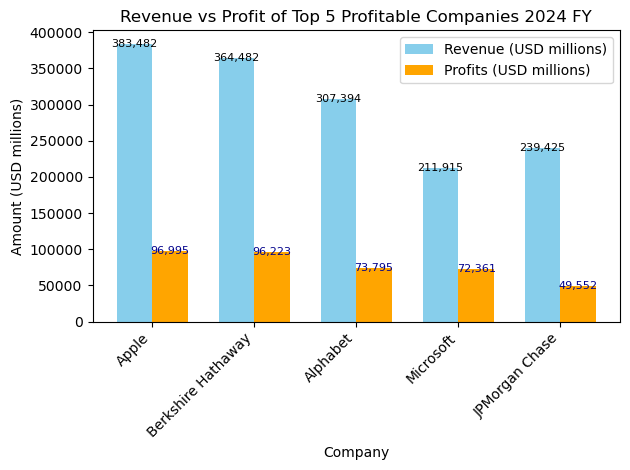

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns


bar_width = 0.35
x = range(len(top_5_profit))


plt.bar(x, top_5_profit['Revenue (USD millions)'], width=bar_width, label='Revenue (USD millions)', color='skyblue')
plt.bar([i + bar_width for i in x], top_5_profit['Profits(USD millions)'], width=bar_width, label='Profits (USD millions)', color='orange')


for i, value in enumerate(top_5_profit['Revenue (USD millions)']):
    plt.text(i, value , f'{value:,}', ha='center', va='center', fontsize=8, color='black')  

for i, value in enumerate(top_5_profit['Profits(USD millions)']):
    plt.text(i + bar_width, value , f'{value:,}', ha='center', va='center', fontsize=8, color='darkblue')


plt.xticks([i + bar_width / 2 for i in x], top_5_profit['Name'], rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('Amount (USD millions)')
plt.title('Revenue vs Profit of Top 5 Profitable Companies 2024 FY')
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()


# Compare revenue vs. profit for the top 5 revenue companies

In [158]:
top_5_revenue = combined_df.nlargest(5, 'Revenue (USD millions)')[['Name', 'Revenue (USD millions)', 'Profits(USD millions)', 'Revenue growth']]
print("\nInteractive Insight:")
print("Top 5 revenue Companies (Revenue vs Profit):")
top_5_revenue


Interactive Insight:
Top 5 revenue Companies (Revenue vs Profit):


,Name,Revenue (USD millions),Profits(USD millions),Revenue growth
0,Amazon,574785,30425,11.9
1,Apple,383482,96995,-2.8
2,Berkshire Hathaway,364482,96223,20.7
3,ExxonMobil,344582,36010,-16.7
4,Alphabet,307394,73795,8.7


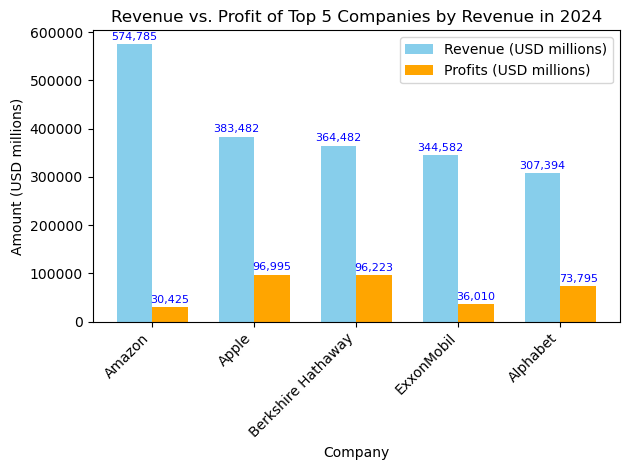

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

bar_width = 0.35
x = range(len(top_5_revenue))


plt.bar(x, top_5_revenue['Revenue (USD millions)'], width=0.35, label='Revenue (USD millions)', color='skyblue')
plt.bar([i + bar_width for i in x], top_5_revenue['Profits(USD millions)'], width=bar_width, label='Profits (USD millions)', color='orange')
for i, value in enumerate(top_5_revenue['Revenue (USD millions)']):
    plt.text(i, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=8, color='blue') 
for i, value in enumerate(top_5_revenue['Profits(USD millions)']):
    plt.text(i+bar_width, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=8, color='blue') 
# Adding labels and title
plt.xticks([i + bar_width / 2 for i in x], top_5_revenue['Name'], rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('Amount (USD millions)')
plt.title('Revenue vs. Profit of Top 5 Companies by Revenue in 2024')
plt.legend()
plt.tight_layout()


plt.show()


# Industry-wise revenue for 2024 (Table 1)

In [160]:
industry_revenue_2024 = df.groupby('Industry')['Revenue (USD millions)'].sum().reset_index()
industry_revenue_2024['Year'] = 2024
industry_revenue_2024 = industry_revenue_2024.sort_values(by='Revenue (USD millions)', ascending=False,ignore_index=True)

# Industry-wise revenue for 2023 (Table 2)

In [161]:
industry_revenue_2023 = df2.groupby('Industry')['Revenue (USD millions)'].sum().reset_index()
industry_revenue_2023['Year'] = 2023
industry_revenue_2023 = industry_revenue_2023.sort_values(by='Revenue (USD millions)', ascending=False,ignore_index=True)

In [162]:

combined_industry_revenue = pd.concat([industry_revenue_2024, industry_revenue_2023],ignore_index=True)


print("Industry-wise Revenue for 2024:")
print(industry_revenue_2024)

print("\nIndustry-wise Revenue for 2023:")
print(industry_revenue_2023)

print("\nCombined Industry-wise Revenue (2023 vs 2024):")
print(combined_industry_revenue)


top_5_industries_2024 = industry_revenue_2024.head()


top_5_industries_2023 = industry_revenue_2023.head()


print("Top 5 Industries by Revenue in 2024:")
print(top_5_industries_2024)

print("\nTop 5 Industries by Revenue in 2023:")
print(top_5_industries_2023)

Industry-wise Revenue for 2024:
                               Industry  Revenue (USD millions)  Year
0                                Retail                 1615484  2024
1                            Healthcare                 1324717  2024
2                            Financials                 1279132  2024
3                    Petroleum industry                 1220316  2024
4        Technology and cloud computing                  581169  2024
5            Retail and cloud computing                  574785  2024
6                          Conglomerate                  501356  2024
7               Pharmaceutical industry                  452210  2024
8                            Technology                  442149  2024
9                  Electronics industry                  383482  2024
10                  Automotive industry                  348033  2024
11                   Telecommunications                  310153  2024
12                     Health insurance                  3

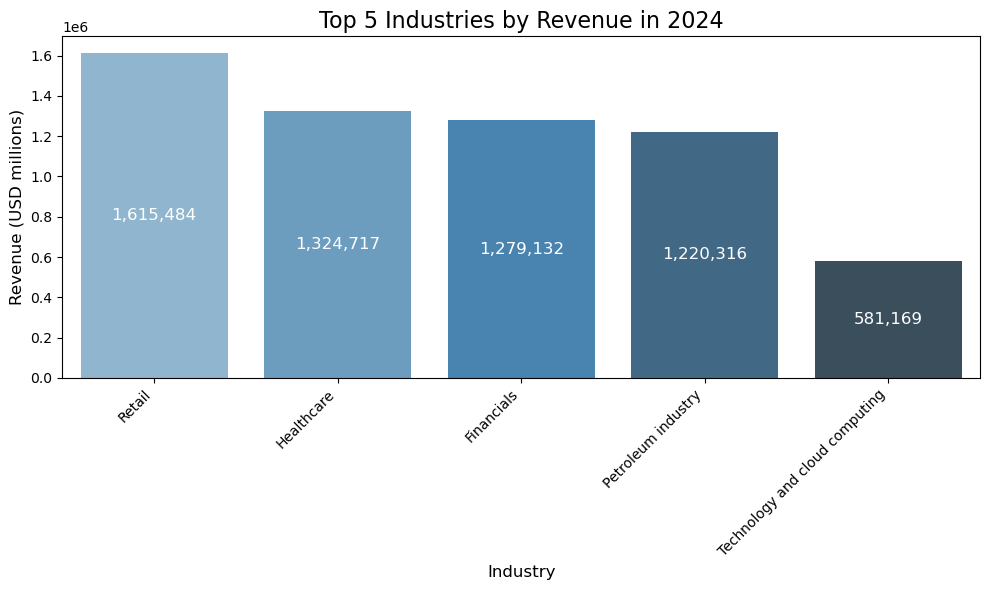

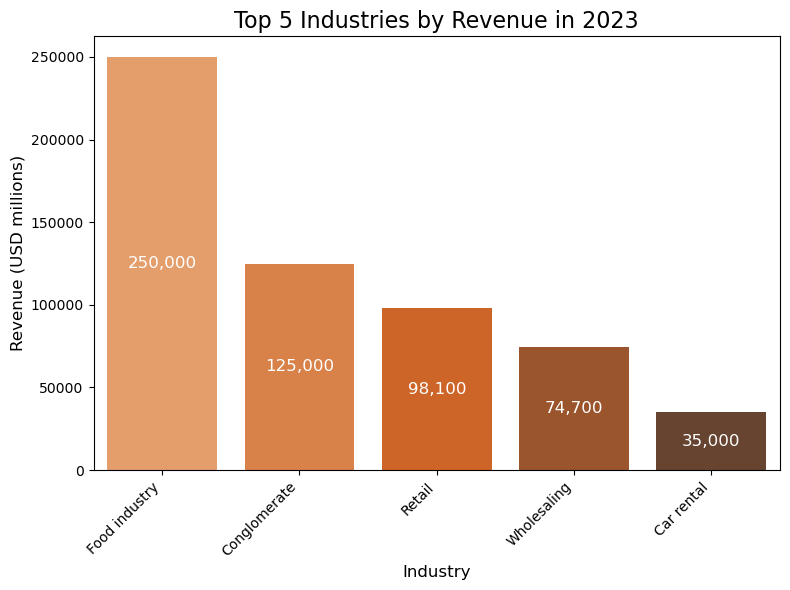

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_5_industries_2024,
    x='Industry',
    y='Revenue (USD millions)',
    palette='Blues_d'
)
plt.title('Top 5 Industries by Revenue in 2024', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Revenue (USD millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  
        (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
        ha='center', va='center', fontsize=12, color='white' 
    )

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=top_5_industries_2023,
    x='Industry',
    y='Revenue (USD millions)',
    palette='Oranges_d'
)
plt.title('Top 5 Industries by Revenue in 2023', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Revenue (USD millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
        ha='center', va='center', fontsize=12, color='white'  
    )

plt.tight_layout()
plt.show()


# correlation between Revenue and profits

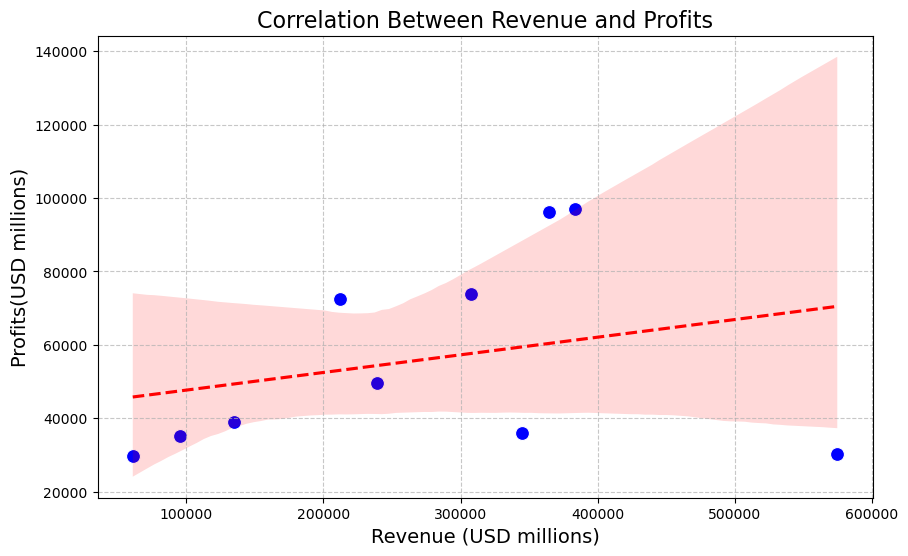

In [164]:
correlation = combined_df["Revenue (USD millions)"].corr(combined_df["Profits(USD millions)"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Revenue (USD millions)",
    y="Profits(USD millions)",
    data=combined_df,
    color="blue",
    s=100
)
plt.title("Correlation Between Revenue and Profits", fontsize=16)
plt.xlabel("Revenue (USD millions)", fontsize=14)
plt.ylabel("Profits (USD millions)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

sns.regplot(
    x="Revenue (USD millions)",
    y="Profits(USD millions)",
    data=combined_df,
    scatter=False,
    color="red",
    line_kws={"linestyle": "dashed"}
)


plt.show()